#Analyse Galaxus
Im folgenden Jupiter Notebook wird der Datensatz der gecrawlten Galaxus Webseite (www.galaxus.ch) Schritt für Schritt analysiert und entsprechende Schlüsse daraus gezogen. In einem ersten Arbeitsschritt wird das Datenset eingelesen und die enthaltenen Datentypen analysiert

## Setup 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "drive/MyDrive/Colab Notebooks"

## Einlesen des Datensets

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
Galaxus = pd.read_excel("drive/MyDrive/Colab Notebooks/galaxusdata_v5.xlsx")

## 1) Analysieren des Datensets

### Variablen und Instances des Datenset

In [5]:
Galaxus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32588 entries, 0 to 32587
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Artikel Name   32588 non-null  object        
 1   Hersteller     32588 non-null  object        
 2   Preis in CHF   32588 non-null  object        
 3   Warengruppe    32588 non-null  object        
 4   Artikelgruppe  32588 non-null  object        
 5   Datum          32588 non-null  datetime64[ns]
 6   Uhrzeit        32588 non-null  datetime64[ns]
 7   Ortschaft      32588 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 2.0+ MB


### Datentypen

Im Datenset sind zwei verschiedene Datentypen vorhanden. Erkennbar ist dies an der Linie "dtypes: datetime64(ns)(2), object(5)" - In der Klammer ist ersichtlich, wie viele Variablen diesem Datentyp zugeordnet sind. 
- datetime64 beschreibt dabei ein Zeit- und Uhrzeitformat 
- Object, auch String genannt, ist eine Kombination aus Zahlen oder/und Buchstaben (Zeichenketten) und muss immer in Gänsefüsschen ""/'' geschrieben werden



### Daten untersuchen

In [6]:
Galaxus.head()

,Artikel Name,Hersteller,Preis in CHF,Warengruppe,Artikelgruppe,Datum,Uhrzeit,Ortschaft
0,Nemesis,Salewa,11.9,Ausverkauf,Sport,2022-04-16 17:51:00,2022-04-16 17:51:00,bern
1,Denali IV,Salewa Internetstores Outdoor,234.9,Ausverkauf,Sport,2022-04-14 09:52:00,2022-04-14 09:52:00,corseaux
2,Fabian,SalesFever Mega M”bel,397.9,Ausverkauf,Wohnen,2022-04-15 19:29:00,2022-04-15 19:29:00,fribourg
3,Wander Hiker GTX Hiking Shoes,Salewa,111.64,Ausverkauf,Sport,2022-04-11 12:29:00,2022-04-11 12:29:00,geneva
4,MTN Trainer Lite GTX Schuhe,Salewa bergzeit,219.94,Ausverkauf,Sport,2022-04-09 05:42:00,2022-04-09 05:42:00,glattfelden


Diese Funktion gibt die ersten fünf Zeilen des Datensets aus. Ich ändere den umständlichen Namen "Preis in CHF" ohne Leerzeichen ab. 

In [7]:
Galaxus = Galaxus.rename(columns = {"Preis in CHF":"Preis"})
Galaxus

,Artikel Name,Hersteller,Preis,Warengruppe,Artikelgruppe,Datum,Uhrzeit,Ortschaft
0,Nemesis,Salewa,11.9,Ausverkauf,Sport,2022-04-16 17:51:00,2022-04-16 17:51:00,bern
1,Denali IV,Salewa Internetstores Outdoor,234.9,Ausverkauf,Sport,2022-04-14 09:52:00,2022-04-14 09:52:00,corseaux
2,Fabian,SalesFever Mega M”bel,397.9,Ausverkauf,Wohnen,2022-04-15 19:29:00,2022-04-15 19:29:00,fribourg
3,Wander Hiker GTX Hiking Shoes,Salewa,111.64,Ausverkauf,Sport,2022-04-11 12:29:00,2022-04-11 12:29:00,geneva
4,MTN Trainer Lite GTX Schuhe,Salewa bergzeit,219.94,Ausverkauf,Sport,2022-04-09 05:42:00,2022-04-09 05:42:00,glattfelden
...,...,...,...,...,...,...,...,...
32583,Badetuch aus Mikrofaser striped XXL,Trevolution,24.9,Wohnen,Textilien,2022-04-14 09:47:00,2022-04-14 09:47:00,zurich
32584,Dennis,Micasa,299.9,Wohnen,Möbel,2022-04-16 06:16:00,2022-04-16 06:16:00,zuzgen
32585,Romano,Micasa,17.8,Wohnen,Textilien,2022-04-09 14:09:00,2022-04-09 14:09:00,zuzgen
32586,Industrial Computer Desk,Vasagle,54.9,Wohnen,Möbel,2022-04-14 17:22:00,2022-04-14 17:22:00,zweidlen


### Überprüfen der Anzahl der Datensätze

In [8]:
len(Galaxus)

32588

Total sind somit 32588 Produkte im Zeitraum vom 8. April - 16. April 2022 gescraped worden

In [9]:
Galaxus.dtypes

Artikel Name             object
Hersteller               object
Preis                    object
Warengruppe              object
Artikelgruppe            object
Datum            datetime64[ns]
Uhrzeit          datetime64[ns]
Ortschaft                object
dtype: object

Die Spalte *Preis* sollte eigentlich vom Datentyp float 64 sein und somit eine Zahl mit Kommazahlen beschreiben. Dies ist ein Hinweis darauf, dass die Spalte Werte enthält, die keine Zahlen sind. Mit der Funktion str.contains('[^0-9.-]') sollten eigentlich diese Zeilen angezeigt werden und im Anschluss rausgelöscht. Nach mehrmaligem try & error wurden die Zeilen im Excel gelöscht und ein neues Dateset hochgeladen. 

In [10]:
non_numeric_Preis = Galaxus.Preis.str.contains('[^0-9.-]')
non_numeric_Preis

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32583    NaN
32584    NaN
32585    NaN
32586    NaN
32587    NaN
Name: Preis, Length: 32588, dtype: object

In [11]:
Galaxus_bearb = pd.read_excel("drive/MyDrive/Colab Notebooks/galaxusdata_v5_bearb.xlsx")
Galaxus_bearb = Galaxus_bearb.rename(columns = {"Preis in CHF":"Preis"})


In [12]:
Galaxus_bearb.dtypes

Artikel Name             object
Hersteller               object
Preis                   float64
Warengruppe              object
Artikelgruppe            object
Datum            datetime64[ns]
Uhrzeit          datetime64[ns]
Ortschaft                object
dtype: object

In [13]:
len(Galaxus_bearb)

32542

Wie nun ersichtlich, hat sich der Datentyp bei *Preis* zu float64 geändert. Im Gegensatz zum ursprünglichen Datenset hat sich das bearbeitete Datenset um 46 Einträge reduziert. Dies macht weniger als 1% aus und ist somit vernachlässigbar.

## 2) Diverse Fragestellungen

### Preisanalyse

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe34a961090>]],
      dtype=object)

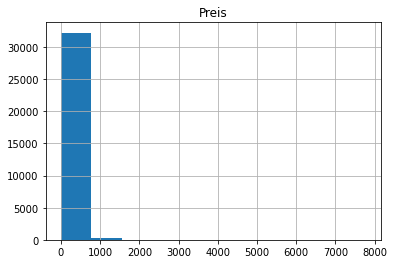

In [14]:
Galaxus_bearb.hist(column=["Preis"])

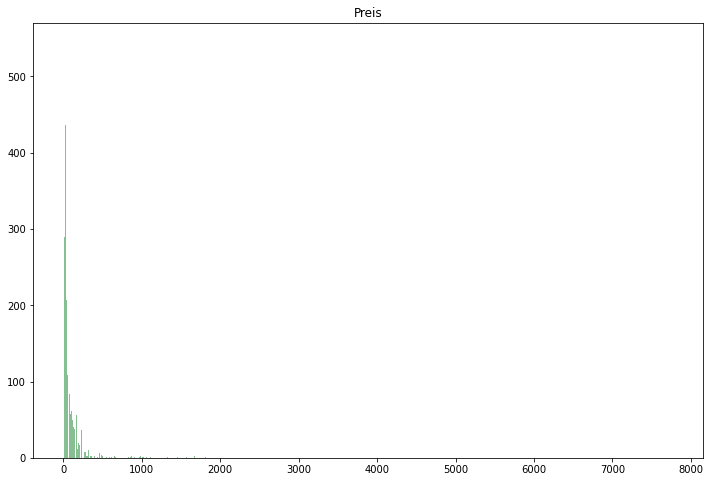

In [15]:
Galaxus_bearb.hist(column="Preis", bins=10000, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9);

Mittels des Histogrammes ist ersichtlich, dass die meisten Produkte in einem Preisrange von 0.5 - 500 Fr. liegen. Die tiefsten und höchsten Werte sind wie folgt:

In [16]:
Galaxus_bearb.Preis.min()

0.5

In [17]:
Galaxus_bearb.Preis.max()

7762.9